In [1]:
import numpy as np
from deap import base, creator
import random
from deap import tools
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
x,y = [], []
f = open("xqf131.tsp.txt", "r")
for l in f:
    row = l.split()
    x.append(row[1])
    y.append(row[2])

In [3]:
x = [int(el) for el in x]
y = [int(el) for el in y]

In [4]:
cities = []
for i in range(len(x)):
    cities.append([x[i], y[i]])

In [5]:
def distance(c1, c2):
    xDis = abs(c1[0] - c2[0])
    yDis = abs(c1[1] - c2[1])
    dist = np.sqrt((xDis ** 2) + (yDis ** 2))
    return dist

In [6]:
distances = np.zeros((len(cities), len(cities)))
for i in range(len(cities)):
    for j in range(len(cities)):
        distances[i, j] = distance(cities[i], cities[j])

In [7]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [8]:
toolbox = base.Toolbox()

In [9]:
toolbox.register("indices", random.sample, range(len(cities)), len(cities))

In [10]:
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

In [11]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [12]:
[individual[:10] for individual in toolbox.population(n = 5)]

[[17, 81, 110, 66, 74, 19, 118, 116, 46, 68],
 [126, 96, 109, 69, 98, 44, 107, 14, 18, 21],
 [37, 3, 41, 120, 128, 0, 125, 1, 102, 29],
 [89, 121, 6, 59, 108, 11, 19, 13, 16, 98],
 [69, 15, 5, 39, 120, 98, 42, 25, 18, 84]]

In [13]:
def EVALUATE(individual):
    summation = 0
    start = individual[0]
    for i in range(1, len(individual)):
        end = individual[i]
        summation += distances[start][end]
        start = end
    return summation

In [14]:
toolbox.register("evaluate", EVALUATE)

In [15]:
def MUTATE(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            city1 = individual[swapped]
            city2 = individual[swapWith]
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [16]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", MUTATE, mutationRate = 0.01)
toolbox.register("select", tools.selTournament, tournsize=10)

In [17]:
POPULATION_SIZE = 200
N_ITERATIONS = 3000
N_MATINGS = 50

In [18]:
population = toolbox.population(n=POPULATION_SIZE)

In [19]:
fitnesses = [(individual, toolbox.evaluate(individual)) for individual in population]
for individual, fitness in fitnesses:
    individual.fitness.values = (fitness,)

In [20]:
def p(population):
    for _ in range(N_MATINGS):
        i1, i2 = np.random.choice(range(len(population)), size=2, replace=False)
        p1, p2 = toolbox.mate(population[i1], population[i2])           
        yield toolbox.mutate(p1)
        yield toolbox.mutate(p2)

In [21]:
for iteration in tqdm(list(range(1, N_ITERATIONS + 1))):
    current_population = list(map(toolbox.clone, population))
    pop = list(p(current_population))            
    for child in pop:
        current_population.append(child)
    fitnesses = [(individual, toolbox.evaluate(individual)) for individual in current_population]
    for individual, fitness in fitnesses:
        individual.fitness.values = (fitness,)
    population[:] = toolbox.select(current_population, len(population))

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [02:34<00:00, 19.39it/s]


In [22]:
fitnesses = sorted([(i, toolbox.evaluate(individual)) for i, individual in enumerate(population)], key=lambda x: x[1])

fitnesses[:5]

[(0, 956.771615190207),
 (1, 956.771615190207),
 (2, 956.771615190207),
 (3, 956.771615190207),
 (4, 956.771615190207)]

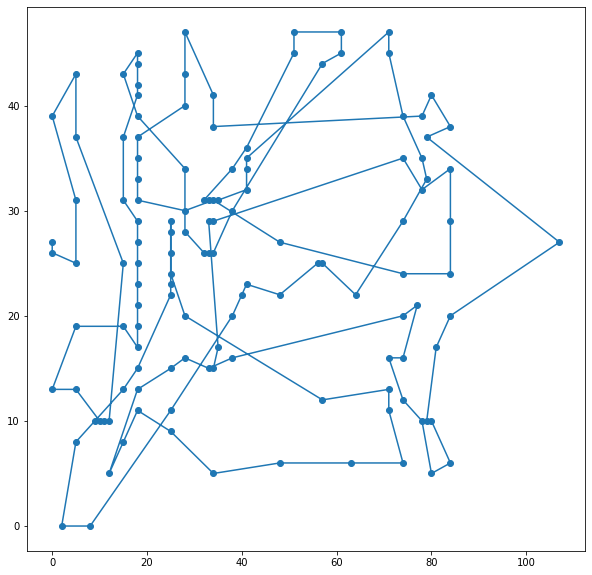

In [23]:
figure(figsize=(10,10))
plt.scatter(x, y)
from operator import itemgetter 
route_x = itemgetter(*population[0])(x)
route_y = itemgetter(*population[0])(y)
plt.plot(route_x, route_y)
plt.xlim = (0, 100)
plt.ylim = (0, 100)